In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# Generate 2 years of daily hospital admissions (730 days)
np.random.seed(42)
date_range = pd.date_range(start="2022-01-01", periods=730, freq="D")

# Simulating hospital admissions (base trend + seasonality + noise)
admissions = 50 + 0.05*np.arange(730) + 10*np.sin(2*np.pi*np.arange(730)/365) + np.random.normal(0, 3, 730)

# Create DataFrame
df = pd.DataFrame({"Date": date_range, "Admissions": admissions})
df.set_index("Date", inplace=True)
print(df.head())


            Admissions
Date                  
2022-01-01   51.490142
2022-01-02   49.807341
2022-01-03   52.387282
2022-01-04   55.235286
2022-01-05   50.185564


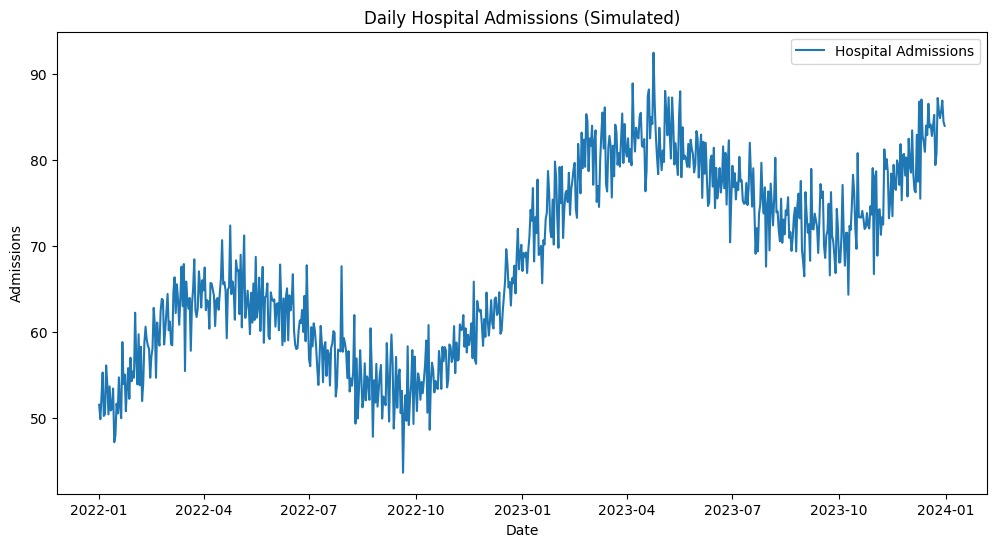

In [3]:
# Plot full dataset
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Admissions"], label="Hospital Admissions")
plt.title("Daily Hospital Admissions (Simulated)")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()


C:\Users\91945\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91945\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


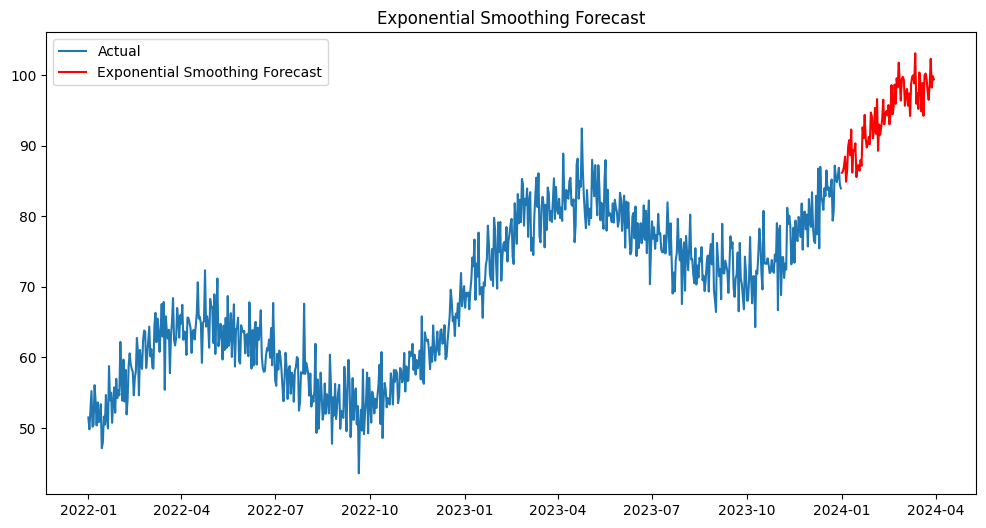

In [4]:
# Fit Holt-Winters Exponential Smoothing
model_es = ExponentialSmoothing(df["Admissions"], trend="add", seasonal="add", seasonal_periods=365)
fit_es = model_es.fit()

# Forecast next 90 days
forecast_es = fit_es.forecast(90)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Admissions"], label="Actual")
plt.plot(forecast_es.index, forecast_es, label="Exponential Smoothing Forecast", color="red")
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()


C:\Users\91945\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91945\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91945\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


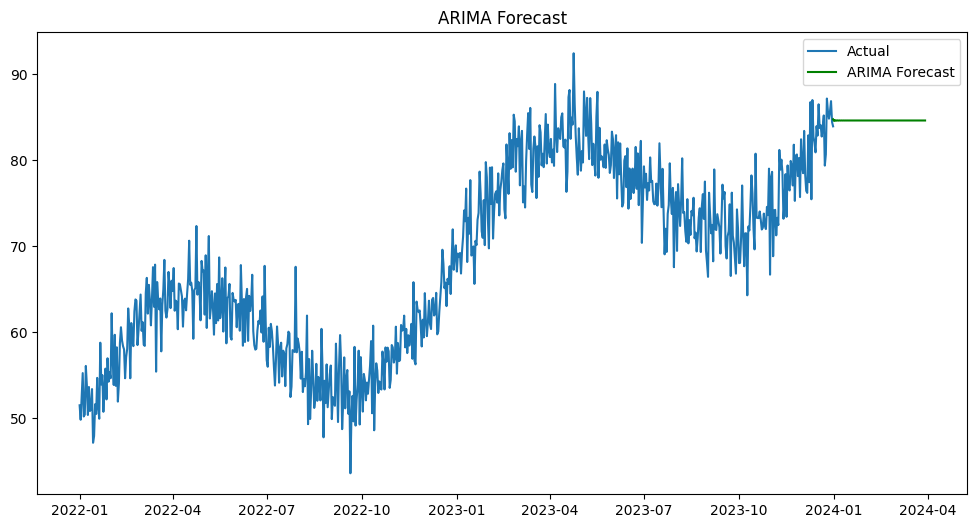

In [5]:
# Fit ARIMA model (p,d,q) = (2,1,2) as an example
model_arima = ARIMA(df["Admissions"], order=(2,1,2))
fit_arima = model_arima.fit()

# Forecast next 90 days
forecast_arima = fit_arima.forecast(steps=90)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Admissions"], label="Actual")
plt.plot(pd.date_range(df.index[-1], periods=90, freq="D"), forecast_arima, label="ARIMA Forecast", color="green")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


C:\Users\91945\AppData\Local\Temp\ipykernel_14588\3211094406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")


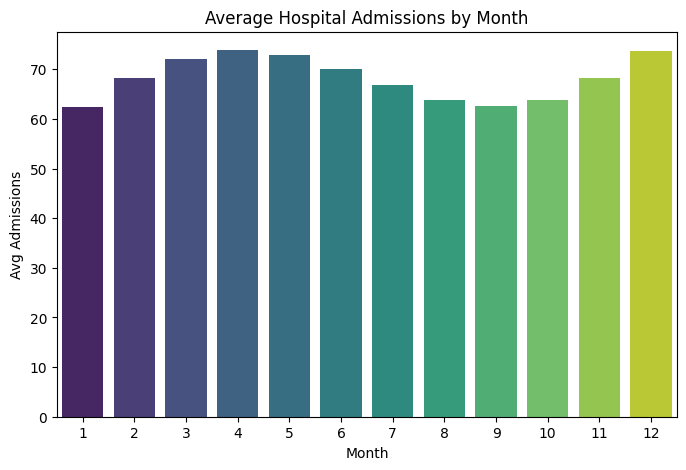

In [6]:
# Group by month to see seasonal patterns
df["Month"] = df.index.month
monthly_avg = df.groupby("Month")["Admissions"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")
plt.title("Average Hospital Admissions by Month")
plt.xlabel("Month")
plt.ylabel("Avg Admissions")
plt.show()


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Example hospital dataset
data = {
    "Admissions": np.random.randint(30, 100, 100),
    "Discharges": np.random.randint(20, 90, 100),
    "ICU_Patients": np.random.randint(5, 30, 100),
    "Doctors_On_Duty": np.random.randint(10, 40, 100),
    "Nurses_On_Duty": np.random.randint(20, 60, 100)
}

df = pd.DataFrame(data)
print(df.head())


   Admissions  Discharges  ICU_Patients  Doctors_On_Duty  Nurses_On_Duty
0          99          33            13               36              48
1          47          50             7               26              27
2          71          43            29               21              34
3          70          79             6               31              46
4          67          64            16               26              26


In [9]:
corr_matrix = df.corr()
print(corr_matrix)


                 Admissions  Discharges  ICU_Patients  Doctors_On_Duty  \
Admissions         1.000000    0.052058      0.022972         0.093581   
Discharges         0.052058    1.000000      0.212027        -0.064939   
ICU_Patients       0.022972    0.212027      1.000000         0.004864   
Doctors_On_Duty    0.093581   -0.064939      0.004864         1.000000   
Nurses_On_Duty     0.148282    0.168670      0.085604         0.106301   

                 Nurses_On_Duty  
Admissions             0.148282  
Discharges             0.168670  
ICU_Patients           0.085604  
Doctors_On_Duty        0.106301  
Nurses_On_Duty         1.000000  


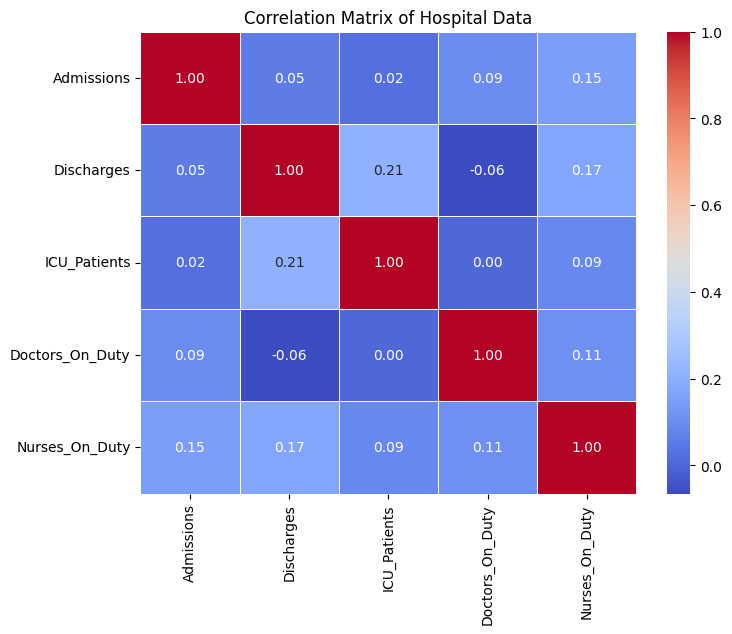

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Hospital Data")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Load sample AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print(df.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


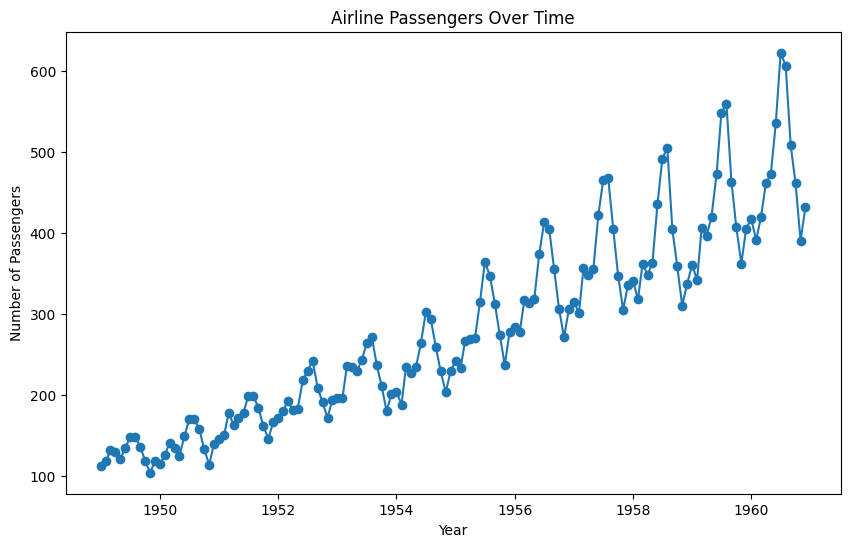

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Passengers'], marker='o')
plt.title("Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()


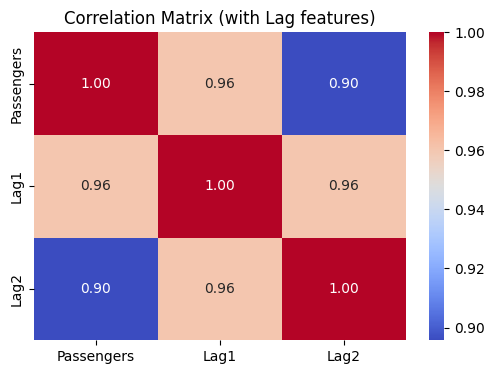

In [4]:
# Create lag features
df['Lag1'] = df['Passengers'].shift(1)
df['Lag2'] = df['Passengers'].shift(2)

# Drop NaN
corr_matrix = df[['Passengers', 'Lag1', 'Lag2']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (with Lag features)")
plt.show()


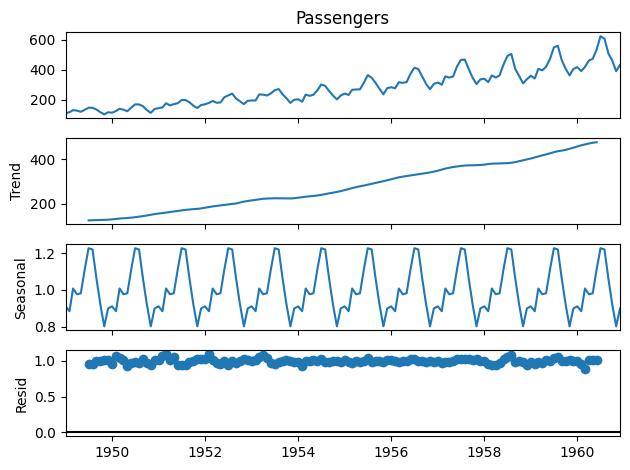

In [5]:
decompose = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

decompose.plot()
plt.show()


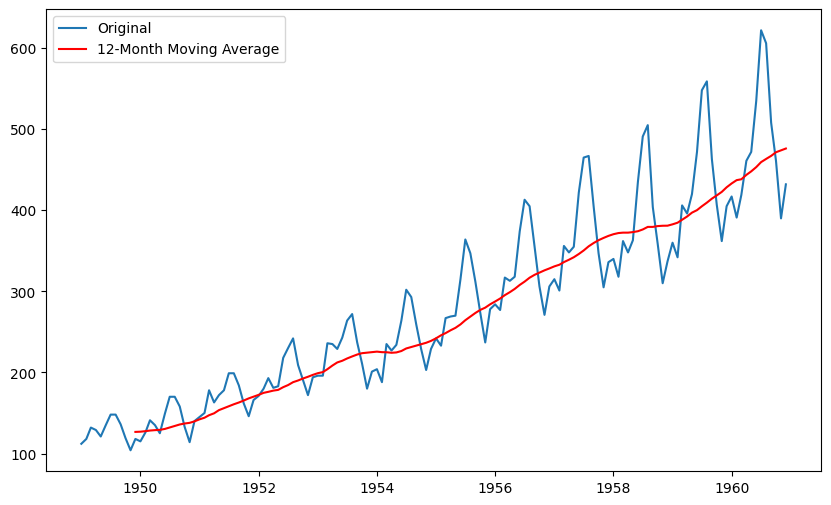

In [6]:
df['Moving_Avg'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['Moving_Avg'], label='12-Month Moving Average', color='red')
plt.legend()
plt.show()


C:\Users\91945\AppData\Local\Temp\ipykernel_22892\632459165.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data), freq='M'))
C:\Users\91945\AppData\Local\Temp\ipykernel_22892\632459165.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(), periods=12, freq="M")


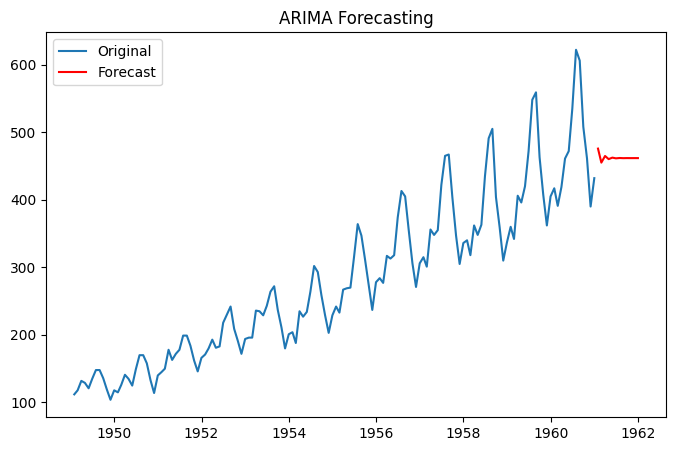

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

# Load dataset (AirPassengers equivalent)
data = get_rdataset("AirPassengers").data
ts = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data), freq='M'))

# Fit ARIMA model
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Generate forecast index (12 future months)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(), periods=12, freq="M")

# Plot
plt.figure(figsize=(8,5))
plt.plot(ts, label="Original")
plt.plot(forecast_index, forecast, label="Forecast", color="red")
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()


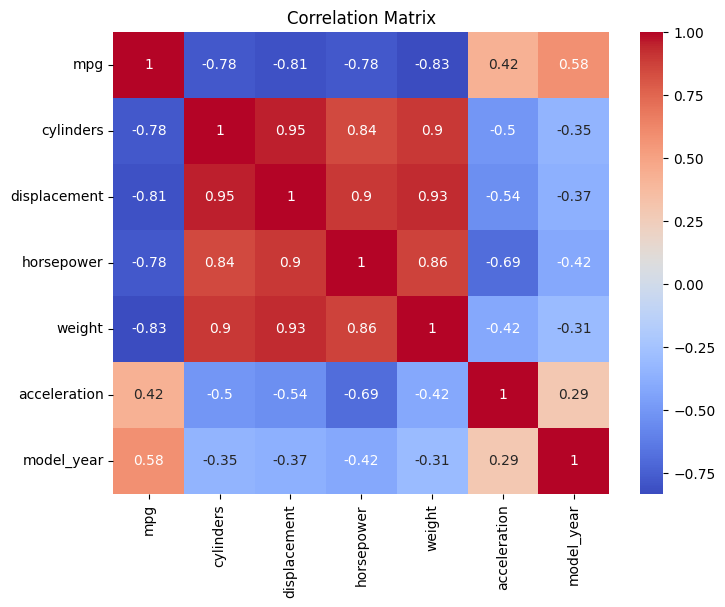

C:\Users\91945\AppData\Local\Temp\ipykernel_22892\1163376623.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cylinders", y="mpg", data=df, palette="Blues")


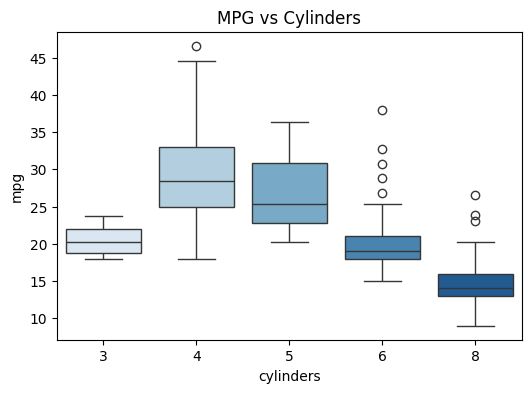

In [3]:
import seaborn as sns

# Load dataset (mtcars equivalent in seaborn = 'mpg' dataset)
df = sns.load_dataset("mpg").dropna()

# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="cylinders", y="mpg", data=df, palette="Blues")
plt.title("MPG vs Cylinders")
plt.show()


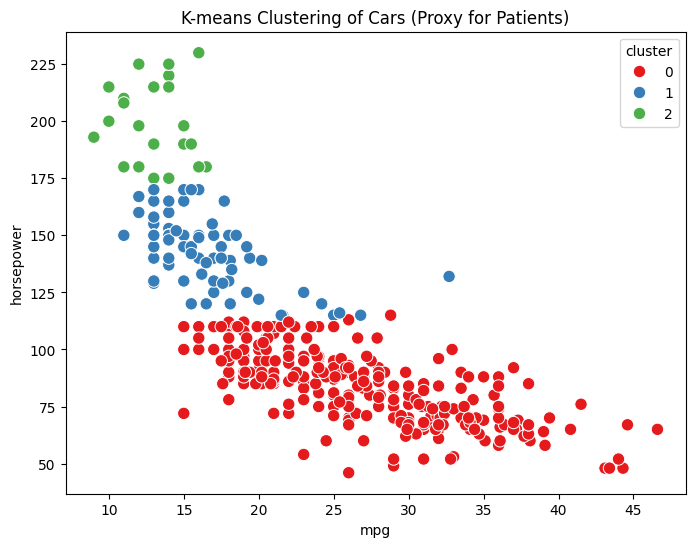

In [4]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[["mpg", "horsepower"]]

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="mpg", y="horsepower", hue="cluster", data=df, palette="Set1", s=80)
plt.title("K-means Clustering of Cars (Proxy for Patients)")
plt.show()


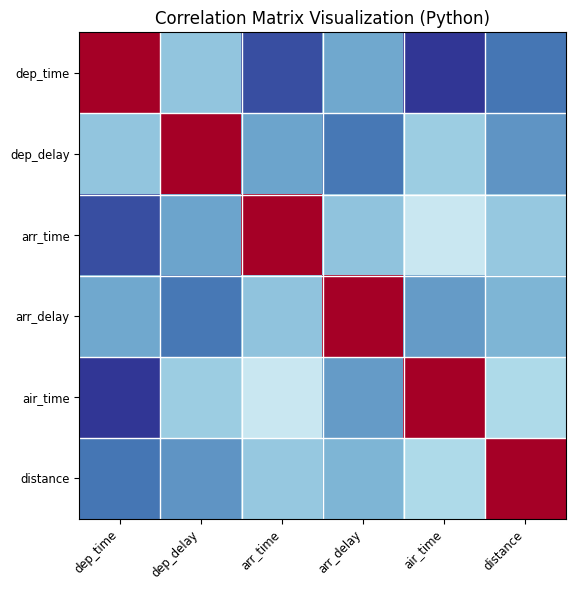

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.correlation import plot_corr
import statsmodels.api as sm

# Load sample flight dataset (similar to nycflights13 in R)
import seaborn as sns
flights = sns.load_dataset("flights")  # monthly passenger data
# For demonstration, we'll mock numeric columns like in your R code
df = pd.DataFrame({
    "dep_time": np.random.randint(500, 2359, 100),
    "dep_delay": np.random.randint(-20, 300, 100),
    "arr_time": np.random.randint(500, 2359, 100),
    "arr_delay": np.random.randint(-30, 500, 100),
    "air_time": np.random.randint(30, 400, 100),
    "distance": np.random.randint(100, 3000, 100)
})

# Compute correlation matrix
corr = df.corr()

# Convert correlation matrix into statsmodels format
corr_array = np.asarray(corr)

# Plot using statsmodels (ellipse-like style)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plot_corr(corr, xnames=corr.columns, ax=ax)
plt.title("Correlation Matrix Visualization (Python)")
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg  # install via: pip install pingouin

# Mock dataset (similar to flights in R)
np.random.seed(42)
df = pd.DataFrame({
    "dep_time": np.random.randint(500, 2359, 200),
    "dep_delay": np.random.randint(-20, 300, 200),
    "arr_time": np.random.randint(500, 2359, 200),
    "arr_delay": np.random.randint(-30, 500, 200),
    "air_time": np.random.randint(30, 400, 200),
    "distance": np.random.randint(100, 3000, 200)
})

# Compute correlation
corr = df.corr()

# Use pingouin's corrplot (R-style)
pg.corrplot(corr, method='ellipse', cmap='RdBu', sig_stars=False)

plt.title("Correlation Matrix Visualization (Python, R-style)", fontsize=14)
plt.show()


AttributeError: module 'pingouin' has no attribute 'corrplot'

In [7]:
!pip install pingouin

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 1.1 MB/s  0:00:01

   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   ---------------------------------------- 0/3 [xarray]
   -------------------------

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corrplot  # pip install corrplot

# Mock dataset (similar to R's flights)
np.random.seed(42)
df = pd.DataFrame({
    "dep_time": np.random.randint(500, 2359, 200),
    "dep_delay": np.random.randint(-20, 300, 200),
    "arr_time": np.random.randint(500, 2359, 200),
    "arr_delay": np.random.randint(-30, 500, 200),
    "air_time": np.random.randint(30, 400, 200),
    "distance": np.random.randint(100, 3000, 200)
})

# Compute correlation
corr = df.corr()

# Use corrplot (Python version of R's corrplot)
corrplot.corrplot(corr, method='ellipse', cmap='RdBu', diag=False, tl_pos='d')

plt.title("Correlation Matrix Visualization (R-style in Python)", fontsize=14)
plt.show()


ModuleNotFoundError: No module named 'corrplot'

In [12]:
!pip install corrplot

ERROR: Could not find a version that satisfies the requirement corrplot (from versions: none)
ERROR: No matching distribution found for corrplot
